# DESAFIO MODELO DE RECOMENDAÇÃO

### Objetivo:

Criar um modelo de Recomendação de Produtos a partir da base de dados pública Online Retail que pode ser encontrada nesta URL: http://archive.ics.uci.edu/ml/datasets/Online+Retail

### Necessidade:

O modelo de recomendação em Python foi desenvolvido com base nos critérios abaixo:

•	Explicar o porque escolheu o algoritmo de recomendação usado (e porque não usou outros);<br/>
•	Receber as entradas específicas (escolher as variáveis pertinentes);<br/>
•	Justificar a escolha das variáveis;<br/>
•	Justificar a performance do modelo de recomendação, com base nos métodos de avaliação pertinentes.<br/>



In [2]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
def create_basket(pais, df):
    """
    Criar dataframe matriz com dados de do país especificado no modelo do apriori
    Args: 
        pais = País que deseja filtrar
        df = dataframe que deseja aplicar a regra
    Return: DataFrame com os dados já no modelo que o apriori necessita
    """
    basket = (df[df['Country'] == pais]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
    basket = basket.applymap(lambda x: 1 if x >= 1 else 0)
    return basket

In [4]:
# Carregando os dados 
df_vendas = pd.read_excel("Online Retail.xlsx")

In [5]:
#remove Removendo valores NaN e espaços em branco
df_vendas['Description'] = df_vendas['Description'].str.strip()
df_vendas.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df_vendas.dropna(axis=0, subset=['Description'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540454 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      540454 non-null object
StockCode      540454 non-null object
Description    540454 non-null object
Quantity       540454 non-null int64
InvoiceDate    540454 non-null datetime64[ns]
UnitPrice      540454 non-null float64
CustomerID     406829 non-null float64
Country        540454 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.1+ MB


In [6]:
# Recomendo vendas canceladas
df_vendas['InvoiceNo'] = df_vendas['InvoiceNo'].astype('str')
df_vendas = df_vendas[~df_vendas['InvoiceNo'].str.contains('C')]

In [7]:
# Verificando os países que possuem mais dados
df_vendas.groupby(['Country'])['InvoiceNo'].count().sort_values(ascending=False).head()

Country
United Kingdom    486167
Germany             9042
France              8408
EIRE                7894
Spain               2485
Name: InvoiceNo, dtype: int64

De acordo com informação acima, podemos verificar os países que mais possuem informações para serem trabalhadas. Vamos trabalhar com os dois países que mais possuem dados, sendo Germany e France.

## Sistema de Recomendação Germany

In [174]:
# Criando matriz com dados Germany
basket_germany = create_basket("Germany", df_vendas)

In [175]:
# Deletando a segmentação POSTAGE, pois iremos trabalhar somente com os produtos para recomendação
basket_germany.drop('POSTAGE', inplace=True, axis=1)

In [178]:
# Criando o modelo e imprimindo a saída da recomendação com os dados para análise para os 5 primeiros ordenados por lift
frequent_itemsets = apriori(basket_germany, min_support=0.04, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values(['lift'], ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
38,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.056893,0.052516,0.045952,0.807692,15.379808,0.042964,4.926915
39,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.052516,0.056893,0.045952,0.875000,15.379808,0.042964,7.544858
24,(RED RETROSPOT CHARLOTTE BAG),(WOODLAND CHARLOTTE BAG),0.070022,0.126915,0.059081,0.843750,6.648168,0.050194,5.587746
25,(WOODLAND CHARLOTTE BAG),(RED RETROSPOT CHARLOTTE BAG),0.126915,0.070022,0.059081,0.465517,6.648168,0.050194,1.739959
2,(JUMBO BAG WOODLAND ANIMALS),(JUMBO BAG RED RETROSPOT),0.100656,0.078775,0.048140,0.478261,6.071256,0.040211,1.765682


Como podemos ver no quadro acima, um cliente tem 15 vezes mais chances de comprar "SET/6 RED SPOTTY PAPER PLATES" se comprar "SET/6 RED SPOTTY PAPER CUPS". Também podemos identificar que essa afirmação é embasada em uma confiança de 80,77%.

In [165]:
# Transformando os dados das colunas em array
support = rules['support'].values
confidence = rules['confidence'].values

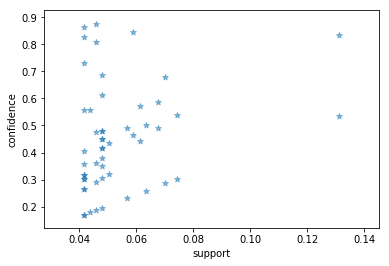

52


In [166]:
# Preparando e plotanado gráfico de dispersão
plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()
print(len(support))

Com o gráfico de dispersão acima conseguimos enxergar melhor os pontos de suporte e confiança das 52 duas relações identificadas.

## Sistema de Recomendação France

In [167]:
# Criando matriz com dados France
basket_france = create_basket("France", df_vendas)
basket_france.drop('POSTAGE', inplace=True, axis=1)

In [179]:
# Criando o modelo e imprimindo a saída da recomendação com os dados para análise para os 5 primeiros ordenados por lift
frequent_itemsets = apriori(basket_france, min_support=0.06, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values(['lift'], ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(CHILDRENS CUTLERY DOLLY GIRL),(CHILDRENS CUTLERY SPACEBOY),0.071429,0.068878,0.063776,0.892857,12.962963,0.058856,8.690476
7,(CHILDRENS CUTLERY SPACEBOY),(CHILDRENS CUTLERY DOLLY GIRL),0.068878,0.071429,0.063776,0.925926,12.962963,0.058856,12.535714
38,(ALARM CLOCK BAKELIKE RED),"(ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...",0.094388,0.073980,0.063776,0.675676,9.133271,0.056793,2.855230
35,"(ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...",(ALARM CLOCK BAKELIKE RED),0.073980,0.094388,0.063776,0.862069,9.133271,0.056793,6.565689
34,"(ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...",(ALARM CLOCK BAKELIKE GREEN),0.073980,0.096939,0.063776,0.862069,8.892922,0.056604,6.547194


In [180]:
# Transformando os dados das colunas em array
support = rules['support'].values
confidence = rules['confidence'].values

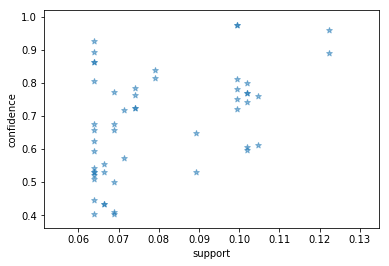

52


In [181]:
# Preparando e plotanado gráfico de dispersão
plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()
print(len(support))

# Conclusão

### Escolha do modelo:

O modelo apriori foi escolhido por se tratar de um dos melhores e mais aplciados modelo Market Basket.

### Variáveis:

Tanto para support como min_threshold, mantive um valor inicial padrão sem demais considerações (somente para testes e análises). Analisando os dados em um primeira instancia podemos ir ajustando para chegar no ideal de acordo com o nosso objetivo. 


### Resultado:

Olhando para as relações podemos identificar que perfis diferentes trazem relações diferentes como é o caso da segmentação país. Por esse motivo a análise exploratória e a análise do resultado de cada algorítimo é tão necessária. Temos que ficar atento para que os outputs, como nas recomendações, sejam verdadeiros e tragam resultados.

Como resultado das recomendações já conseguiriamos fazer recomendações e identificar possíveis relações como por exemplo montagem de kits para aumento de ticket médio e margem. Esses resultados são de extrema importância não somente para recomendação aos usuários como também para apoiar o pessoal de várias áreas, como comercial (compras) e marketing (conteúdo).

Obs: Podemos também analisar produtos e categorias em específico, porém precisariamos categorizar os itens.